In [3]:

from kneed import DataGenerator, KneeLocator
from quick_extract import *
from get_data import *
from load_rhd import *
import matplotlib.pyplot as plt
from ExtractRecordings.manual.simple_sort import*
import pandas as pd
from PostProcessing.tools.utils import *
from tonotopy import *
from matplotlib.colors import ListedColormap, Normalize
from format_data import *
from skimage import measure
import matplotlib.colors as colors
from format_data import *
from utils import *
from create_tt import *
sr = 30e3
t_pre = 0.2#0.2
t_post = 0.30#0.300
bin_width = 0.02
#bin_width = 0.02
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
max_freq = 3
min_freq=3 #3 for A1
threshold = 1 #threshold for contour detection 3.2 is good

In [10]:
path_test='/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240420_SESSION_01/test'
path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240420_SESSION_01'

In [9]:
spk_times = np.load(path_test+'/spk_times.npy')
spk_cluster = np.load(path_test+'/spk_clusters.npy')

In [11]:
an_triggers = np.load(os.path.join(path, "analog_in.npy"))
an_times = ut.extract_analog_triggers_compat(an_triggers[0])

In [12]:
def compute_psth(spike_times, stimulus_times, bin_size, window):
    # Combine all spikes relative to stimulus times
    all_spikes = []
    for stim_time in stimulus_times:
        relative_spikes = spike_times - stim_time
        # Filter spikes within the desired window
        all_spikes.extend(relative_spikes[(relative_spikes >= window[0]) & (relative_spikes <= window[1])])
    
    # Create histogram
    bins = np.arange(window[0], window[1] + bin_size, bin_size)
    hist, bin_edges = np.histogram(all_spikes, bins=bins)
    
    # Normalize to get the firing rate
    psth = hist / (len(stimulus_times) * bin_size)
    return psth, bin_edges

In [15]:
psth, edges = compute_psth(spk_times, an_times, bin_width, [-t_pre, t_post])

NameError: name 'clusters' is not defined

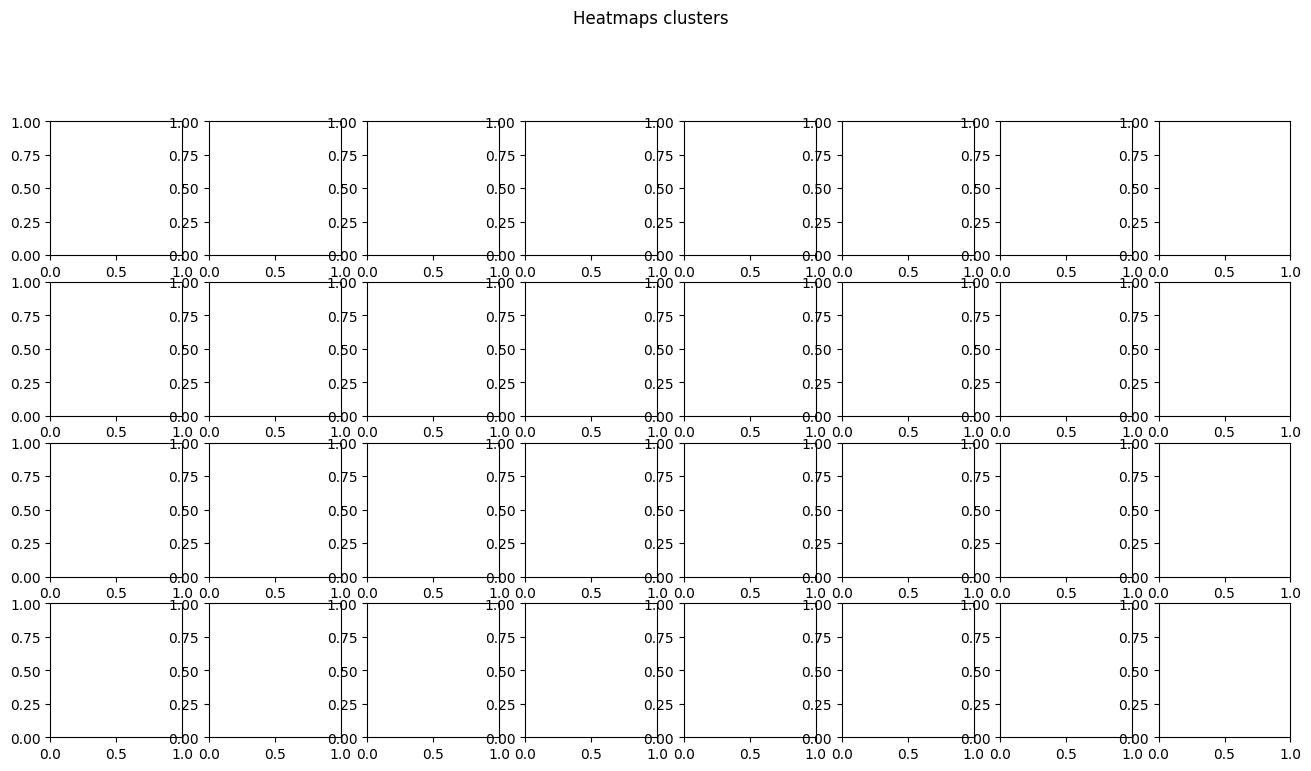

In [16]:
gc = np.arange(0,32)
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 

    #
for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
        spike_times = np.array(spk_times[cluster])
        psth,edges = compute_psth(spike_times, stim_times, bin_width, window)
        axes[row, col].plot(psth_bins, psth)
        axes[row, col].axvline(0, c = 'black', linestyle='--')
        axes[row, col].set_title(f'Cluster {cluster}')


In [33]:
condition = 'tracking'
print(' en cours de traitement')
#create_data_v2(path+folder, bin_width)
data = np.load(path+'/data.npy')
features = np.load(path+'/features.npy', allow_pickle=True)
#true_gc = np.load(path+f'/good_clusters.npy', allow_pickle=True)
gc = np.arange(32)  
unique_tones = np.load(path+'/unique_tones.npy', allow_pickle=True) 

 en cours de traitement


In [13]:
m_neurone = get_mean_neurone(data, features, t_pre, t_post, bin_width, gc)

[17.13916652 17.         16.         15.77328794 16.         17.
 17.13916652] [12.         11.7561964  11.82623723 12.         12.28898034 12.19674775
 12.        ]
[26.         25.         24.92671709 24.         23.04518386 23.78711823
 24.         25.         26.         26.65346871 27.         28.
 29.         29.59924592 29.         28.         27.         26.09573976
 26.        ] [17.01333379 17.00192096 17.         16.91067264 16.         15.
 14.9057597  14.7280743  14.7093022  15.         15.30185475 15.45343087
 15.82998429 16.         16.03302756 16.37651693 16.74828151 17.
 17.01333379]
[28.         27.         26.         25.         24.         23.
 22.         21.         20.         19.99291896 19.65061577 19.89477041
 20.         21.         22.         22.21237088 23.         23.4364183
 24.         25.         26.         26.3331766  27.         28.
 28.57357633 28.51053683 28.        ] [21.2965919  21.62903779 21.52465049 21.33414111 21.26091047 21.50083792
 21.73

'all izz well'

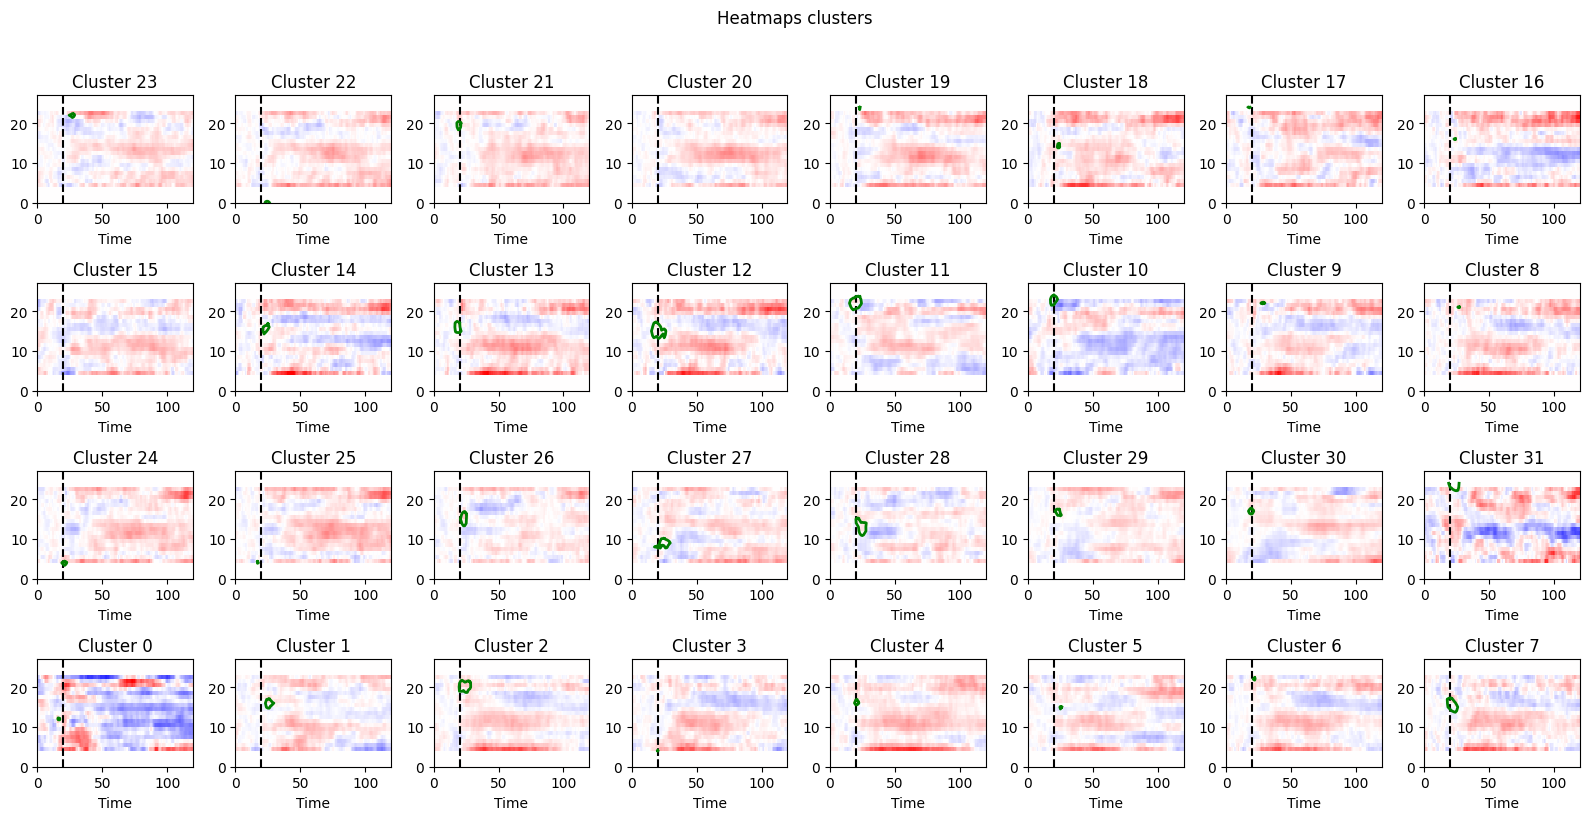

In [34]:
save_name_tono = path+f'/heatmaps_{condition}.npy'
heatmaps = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, max_freq, min_freq, condition, save_name_tono)
plot_heatmap_bandwidth(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, '', condition)

In [17]:
bf = np.load(path+'/best_frequency_tracking.npy', allow_pickle=True)
print(bf)

[  255.   255.   255.  1727.   255. 15667.   255.   959.  2000.   959.
 11676.   255.   255. 11676.   255.   255.  2317.   255.   255.   255.
   255.   715.   255.   255.   715.   255.  5598.   255.   255.   255.
   255.   255.]


In [6]:
bd = np.load(path+'/heatmap_bandwidth.npy', allow_pickle=True)
print(bd)

[[ 6484. 13525.]
 [ 2684.  4172.]
 [ 8701. 15667.]
 [ 3601.  6484.]
 [ 1727.  3601.]
 [ 2000.  3601.]
 [ 1727.  3601.]
 [10079. 21024.]
 [ 4172.  7511.]
 [ 3601. 15667.]
 [11676. 21024.]
 [ 1287.  2317.]
 [ 4172. 10079.]
 [ 8701. 15667.]
 [ 8701. 15667.]
 [13525. 21024.]
 [ 1287.  2317.]
 [18149. 21024.]
 [ 4172.  7511.]
 [ 4172.  5598.]
 [ 4172. 10079.]
 [ 8701. 15667.]
 [ 8701. 15667.]
 [11676. 21024.]
 [  828.  1287.]
 [  959.  1490.]
 [ 3601.  7511.]
 [ 2684.  3601.]
 [ 2317.  6484.]
 [ 5598. 10079.]
 [ 5598. 11676.]
 [ 1727.  4172.]]


In [7]:
in_tr_psth, out_tr_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'tracking')
#in_pb_psth, out_pb_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'tracking')

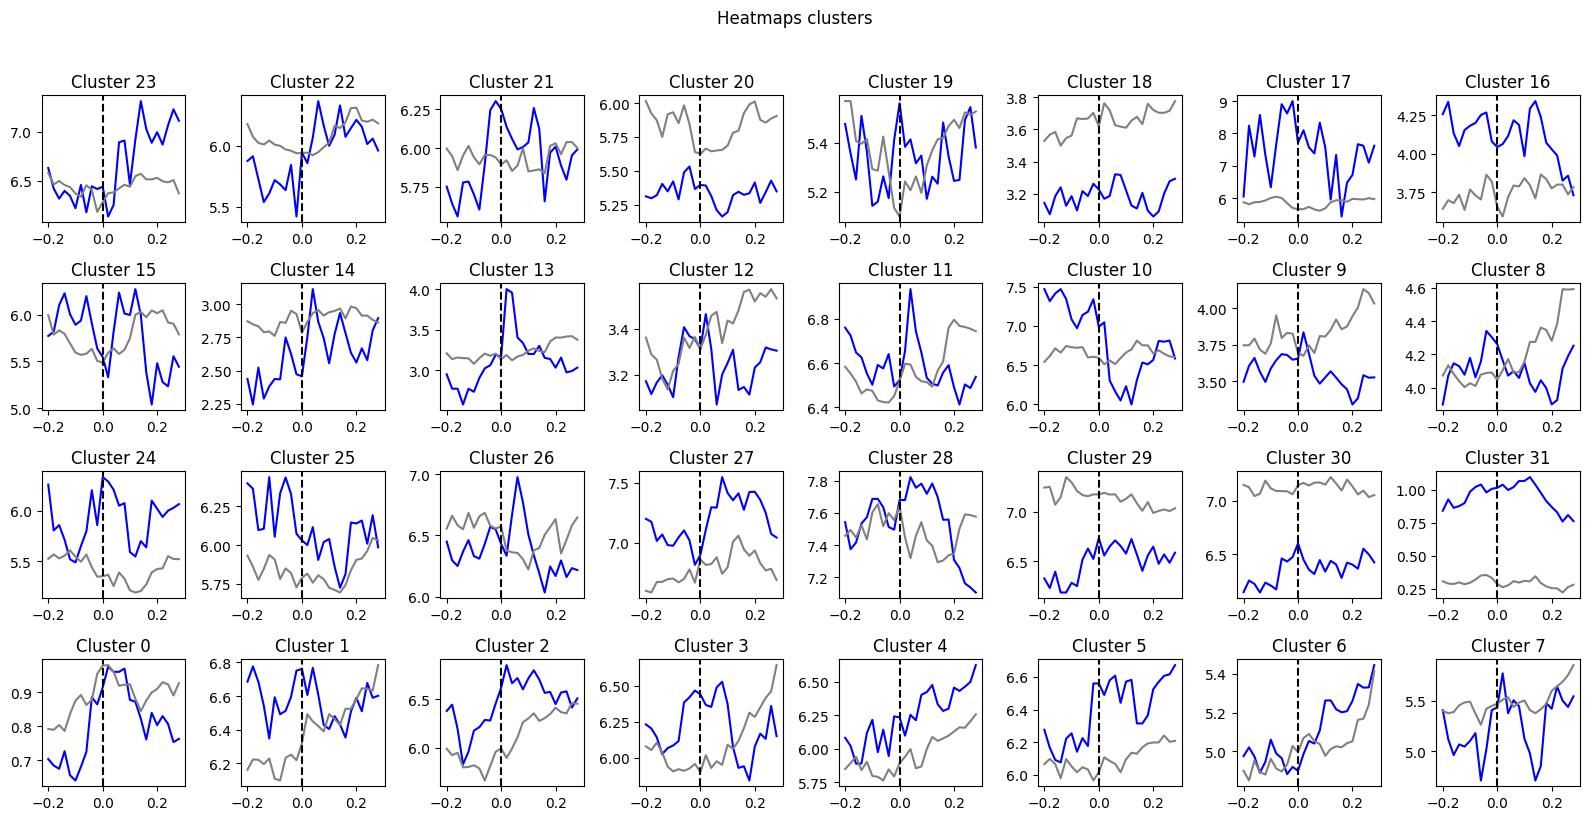

In [8]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
     


    #
for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
            #ax.plot(psth_bins[:-1], in_tr_psth[cluster], c = 'red')
        axes[row, col].plot(psth_bins[:-1], in_tr_psth[cluster], c = 'blue')
        axes[row, col].plot(psth_bins[:-1], out_tr_psth[cluster], c = 'grey')
        axes[row, col].axvline(0, c = 'black', linestyle='--')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
        
        
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()


In [ ]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def create_centered_colormap(abs_max):
    return plt.cm.bwr

def plot_heatmap_bandwidth_flou(heatmaps, threshold, gc, unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre, path, folder, condition):
    """
    Best function pour déterminer la bandwidth et plotter la heatmap et les contours de la bandwidth
    input : heatmaps(contenant plusieurs clusters), le threshold pour la detection du pic, good_clusters
        unique_tones (les fréquences jouées), min_freq, max_freq : les indices des fréquences qu'on exclut (pas assez de présentations)
        condition : 'tracking' ou 'playback'
    output : save plot des heatmap avec la bandwidth entourée .png
            save tableau des heatmaps telles que plottée (avec les psth) .npy
            save tableau contenant les bandwidth de chaque cluster .npy
            
    """

    num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

    # Create a figure with subplots
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    fig.suptitle('Heatmaps clusters', y=1.02)
    plt.subplots_adjust()


    bandwidth = []
    plotted_heatmap = []
    peaks = []

    for cluster in range(num_plots):
        if cluster < num_plots:
            row, col = get_plot_coords(cluster)
            heatmap_cluster = np.array(heatmaps[cluster])
            hm, peak = detect_peak(heatmaps, cluster)
            abs_max = np.max(abs(heatmap_cluster[3:-3])) * 0.4
            contours = get_contour(np.abs(hm), threshold)

            # Je retire la moyenne pre-stim ligne par ligne (fréquence par fréquence)
            t_0 = int(t_pre / bin_width)
            prestim_hm = heatmap_cluster[:, :t_0]
            mean_freq = np.mean(prestim_hm, axis=1)

            for i in range(heatmap_cluster.shape[0]):  # Parcours des lignes de A
                heatmap_cluster[i] -= mean_freq[i]

            smoothed = smooth_2d(heatmap_cluster, 3)

            # je mets des zeros aux frequences trop hautes et trop basses où je n'ai pas
            # assez de présentations
            lowf = np.zeros((min_freq + 1, len(smoothed[0])))
            highf = np.zeros((max_freq + 1, len(smoothed[0])))

            milieu = np.concatenate((lowf, smoothed[min_freq:-max_freq]))

            # Concaténation à l'arrière
            milieu = np.concatenate((milieu, highf))

            abs_max = np.max(np.abs(milieu))  # Determine the abs_max for the current heatmap

            # Normalize colormap for current subplot
            norm = Normalize(vmin=-abs_max, vmax=abs_max)
            img = axes[row, col].pcolormesh(milieu, cmap=create_centered_colormap(abs_max), norm=norm)
            axes[row, col].set_xlabel('Time')
            axes[row, col].set_title(f'Cluster {gc[cluster]}')
            axes[row, col].axvline(x=t_0, color='black', linestyle='--')  # to print a vertical line at the stim onset time

            max_length = 0
            x_c, y_c, minf, maxf = np.nan, np.nan, 0, 0  # au cas où on trouve pas de contour
            for contour in contours:
                if ((contour[:, 1] > t_0 - 5).all() and (contour[:, 1] < t_0 + 10).all()):
                    if len(contour[:, 0]) > max_length:
                        max_length = len(contour[:, 0])
                        x_c = contour[:, 1]
                        y_c = contour[:, 0]
                        maxf = np.max(contour[:, 0])
                        minf = np.min(contour[:, 0])
                        if maxf < len(unique_tones) - 1:
                            maxf += 1
            #axes[row, col].plot(x_c, y_c, linewidth=2, color='green')
            print(x_c, y_c)

            if max_length == 0 or maxf == 0:
                bandwidth.append([np.nan, np.nan])
                peaks.append(np.nan)
            else:
                bandwidth.append([unique_tones[int(minf)], unique_tones[int(maxf)]])
                peaks.append(unique_tones[peak[0]])
            plotted_heatmap.append(milieu)

            # Add colorbar to each subplot
            cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=create_centered_colormap(abs_max)), ax=axes[row, col])
            cbar.ax.set_ylabel('Response', rotation=-90, va="bottom")

    # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(path + folder + f'/heatmap_{condition}.png')  # save the figure of the heatmap
    np.save(path + folder + f'/heatmap_bandwidth.npy', bandwidth)  # save the values of the bandwidth
    np.save(path + folder + f'/heatmap_plot_{condition}.npy', plotted_heatmap)  # save the values of the heatmap as it is plotted
    np.save(path + folder + f'/best_frequency_{condition}.npy', peaks)
    return 'all izz well'

In [ ]:
plot_heatmap_bandwidth_flou(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, '', condition)

In [ ]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
     
#il faut que je ne garde que les good_clusters et convertir en good_clusters 
for cluster in gc: #ici je ne prends que les bons clusters 
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
            #ax.plot(psth_bins[:-1], in_tr_psth[cluster], c = 'red')
        axes[row, col].plot(psth_bins[:-1], np.nanmean(heatmaps[cluster], axis=0), c = 'black')
        axes[row, col].axvline(0, c = 'black', linestyle='--')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
        
        
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()


In [ ]:
bd = np.load(path+'/heatmap_bandwidth.npy', allow_pickle=True)

In [ ]:
in_tr_psth, out_tr_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'tracking')
in_pb_psth, out_pb_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'playback')

In [ ]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
     


    #
for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
            #ax.plot(psth_bins[:-1], in_tr_psth[cluster], c = 'red')
        axes[row, col].plot(psth_bins[:-1], in_pb_psth[cluster], c = 'blue')
        axes[row, col].plot(psth_bins[:-1], out_pb_psth[cluster], c = 'red')
        axes[row, col].axvline(0, c = 'black', linestyle='--')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
        
        
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()


In [ ]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
     


    #
for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
            #ax.plot(psth_bins[:-1], in_tr_psth[cluster], c = 'red')
        axes[row, col].plot(psth_bins[:-1], m_neurone[1][cluster], c = 'black')
        axes[row, col].axvline(0, c = 'black', linestyle='--')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
        
        
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()

In [ ]:

load_rhd(path+'ephys.rhd', save_path, digital=True, analog=True, accelerometer=True, filtered=True, export_to_dat=False)

In [ ]:
#filter_and_cmr(neural_data_2, sampling_rate, save_path)

In [ ]:
#quick_extract(path+'/refiltered_neural_data.npy')

In [14]:

path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240423_SESSION_01/headstage_1'

spk = ut.Spikes(path)
an_triggers = np.load(os.path.join(path, "analog_in.npy"))
an_times = ut.extract_analog_triggers_compat(an_triggers[0])
frequencies, tones_total, triggers_spe, tag = get_data(path, trigs=an_times)
l_spikes = list()

In [15]:
an_times

array([   63326,    65367,    69307, ..., 31203400, 31209980, 31232660])

In [28]:
hm_tonotopy = hm.Heatmap()
hm_tonotopy.compute_heatmap(trigs=an_times, tone_sequence=tones_total, spikes=spk, t_pre=0.100, t_post=0.450,
                                 bin_size=0.005)

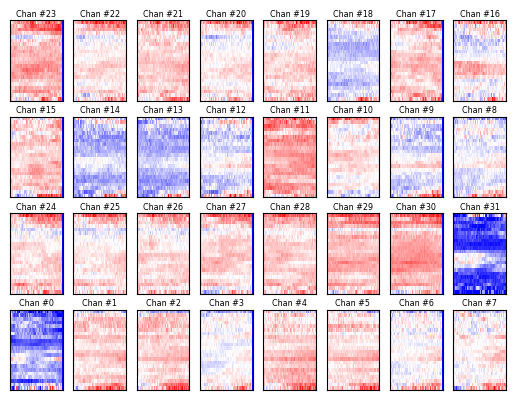

In [29]:
hm_tonotopy = hm.Heatmap()
hm_tonotopy.compute_heatmap(trigs=an_times, tone_sequence=tones_total, spikes=spk, t_pre=0.100, t_post=0.450,
                                 bin_size=0.005)
heatmap = hm_tonotopy
tones = heatmap.get_tones()
heatmaps = heatmap.plot(32, "tono", folder=None, cmap="bwr", l_ex=None, r_ex=None, ext="png")

gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.005
t_pre = 0.1
t_post = 0.5
condition = 'playback'
unique_tones = np.load(path+'/unique_tones.npy', allow_pickle=True)
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)

plot_heatmap_bandwidth(heatmaps,3.7, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, path, condition)

#plot_heatmap_bandwidth_tonotopy(heatmaps,3.7, gc,frequencies,3, -4, t_pre=0.1, t_post=0.5, bin_width=0.01)

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
[25.         24.47992603 25.         25.28057377 25.        ] [17.39910841 17.         16.6745629  17.         17.39910841]
nan nan
nan nan
nan nan
[25.         24.         23.48050348 23.93129783 24.         24.22716682
 25.         25.63707834 25.        ] [18.26265459 18.82428273 18.         17.         16.96918175 17.
 17.4032975  18.         18.26265459]
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240423_SESSION_01/headstage_1/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240423_SESSION_01/headstage_1/heatmap_playback.png'

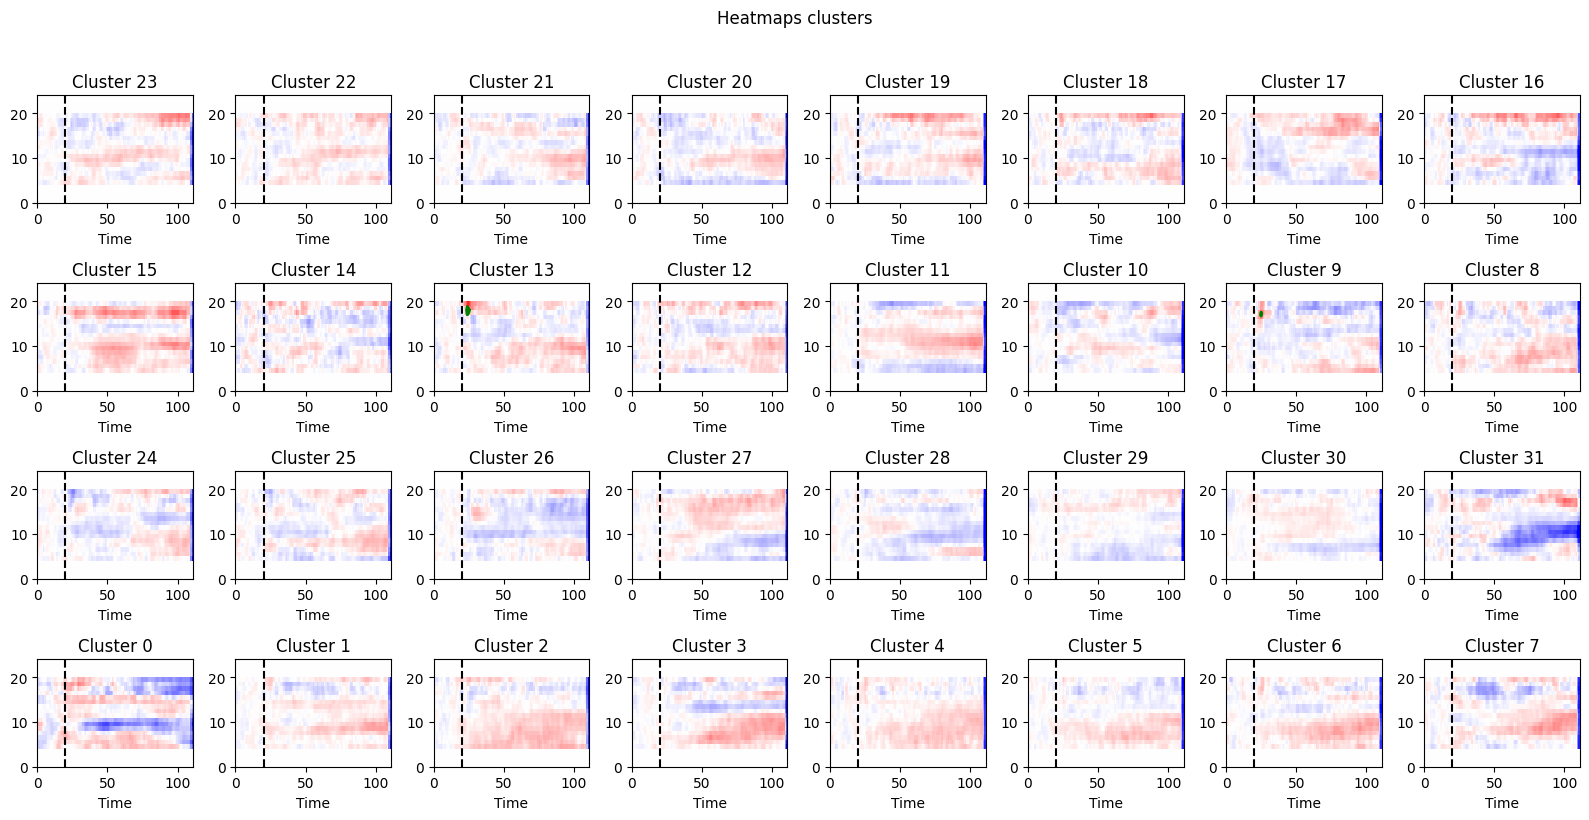

In [30]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.005
t_pre = 0.1
t_post = 0.5
condition = 'playback'
unique_tones = np.load(path+'/unique_tones.npy', allow_pickle=True)
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)

plot_heatmap_bandwidth(heatmaps,3.7, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, path, condition)

#plot_heatmap_bandwidth_tonotopy(heatmaps,3.7, gc,frequencies,3, -4, t_pre=0.1, t_post=0.5, bin_width=0.01)

In [ ]:
def get_tonotopy_basics(path):
    spk = ut.Spikes(path)
    an_triggers = np.load(os.path.join(path, "analog_in.npy"))
    an_times = ut.extract_analog_triggers_compat(an_triggers[0])
    frequencies, tones_total, triggers_spe, tag = get_data(path, trigs=an_times)
    l_spikes = list()
    return spk, an_times, tones_total, frequencies

In [ ]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)

In [ ]:
def psth(spikes, triggers, t_0=0.2, t_1=0.5, bin_size=0.01, bins=None, trigger_unit="seconds", fs=30e3):
    """

    """
    x = raster(spikes, triggers, t_0, t_1, trigger_unit, fs)
    if len(x) == 0:
        return None, None
    x = np.hstack(x)
    if bins is None:
        bins = np.arange(t_0, t_1 + bin_size, bin_size)
    h, b = np.histogram(x, bins)
    h = h.astype(dtype=np.float64)
    h /= (len(triggers) * bin_size)  # donne l'activité
    return h, b

In [ ]:
def process_list(lst):
    # Trouver l'index du premier et dernier True
    first_true = next((i for i, x in enumerate(lst) if x), None)
    last_true = next((i for i, x in enumerate(lst[::-1]) if x), None)
    
    last_true = len(lst) - last_true - 1 if last_true is not None else None
    # Transformer le False entouré de True en un True
    for i in range(first_true + 1, last_true):
        if lst[i-1] and lst[i+1] and not lst[i]:
            lst[i] = True
    return lst

In [ ]:
def get_spikes_cluster(cluster, t_pre, t_post, bin_width, trigs, tone_sequence):
    x = spk.get_spike_times(cluster=cluster)
    hist = list()
    #trigs=an_times
    tones, counts = np.unique(tone_sequence, return_counts=True)
    idx = process_list(list(np.greater(counts, 10)))
    tones = tones[idx]
    idx = np.arange(0, len(tones), dtype=int)
    t_0 = t_pre/bin_width
    all_tones_psth=[]
    for tone in tones:
        tone_idx = np.where(tone_sequence == tone)[0]
        trigger_time = trigs[tone_idx]
        h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=psth_bins)
        hist = list(hist)
        hist.append(h)
        if len(hist) > 0:
            hist = np.vstack(hist)
        else:
            hist = np.zeros((len(tones), len(psth_bins)))
        psths = hist
        all_tones_psth.append(psths)
        
        #plt.axvline(t_0)
        #plt.plot(np.nanmean(psths, axis=0))
        #plt.title(f'Frequency {tone} [Hz]')
        #plt.show()
    #plt.plot(np.nanmean(np.vstack(all_tones_psth), axis=0))
    #plt.axvline(t_0, c = 'black')
    #plt.title(f'Cluster {cluster}')
    #plt.show()
    return all_tones_psth

In [ ]:
len(an_times)
print(len(tones_total))

In [ ]:
first_half = get_spikes_cluster(8, t_pre, t_post, bin_width, an_times[0:900], tones_total[0:900])
second_half = get_spikes_cluster(8, t_pre, t_post, bin_width, an_times[900:1800], tones_total[900:1800])

In [ ]:
len(first_half )
print(len(second_half))

In [ ]:
clus = 8
all_tones_psth =  get_spikes_cluster(clus, t_pre, t_post, bin_width, an_times, tones_total)


num_plots, num_rows, num_columns = get_better_plot_geometry(first_half)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle(f'psth cluster {clus} left per frequency’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for freq, ax in enumerate(axes):
    if freq < num_plots:
        ax.plot(np.nanmean(first_half[freq], axis=0), c = 'green')
        ax.plot(np.nanmean(second_half[freq], axis=0), c = 'orange')
        ax.axvline(t_0, c = 'black')
        ax.set_title(f'Frequency {freq}')
for ax in axes[num_plots:]:
    ax.axis('off')
#plt.savefig(path+f'left_cluster_{clus}.png')
plt.show()
        

In [ ]:
get_better_plot_geometry(gc)
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('psth cluster left’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for clus, ax in enumerate(axes):
    if clus < num_plots:
        psth_clus = get_spikes_cluster(clus, t_pre, t_post, bin_width, an_times, tones_total)
        ax.plot(np.nanmean(np.vstack(psth_clus), axis=0))
        ax.set_title(f'Cluster {clus}')
        ax.axvline(t_0, c = 'black')
for ax in axes[num_plots:]:
    ax.axis('off')
#plt.savefig(path+'psth_cluster_RIGHT.png')
plt.show()
        

In [ ]:
for cluster in gc:
    x = spk.get_spike_times(cluster=cluster)
    hist = []
    trigs=an_times
    tones, counts = np.unique(tones_total, return_counts=True)
    all_tones_psths = []
    for tone in tones:
        tone_idx = np.where(tones_total == tone)[0]
        trigger_time = trigs[tone_idx]
        h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=psth_bins)
        hist = list(hist)
        hist.append(h)
        if len(hist) > 0:
            hist = np.vstack(hist)
        else:
            hist = np.zeros((len(tones), len(psth_bins)))

        psths = hist
        all_tones_psths.append(psths)
        
    plt.plot(np.nanmean(np.vstack(psths), axis=0))
    plt.title(f'cluster {cluster} ')
    
    plt.show()

In [ ]:

tones, counts = np.unique(tone_sequence, return_counts=True)
        #idx = process_list(list(np.greater(counts, 30)))
idx = process_list(list(np.greater(counts, 10)))
        # print(list(np.greater(counts, 30)), idx)
        self.tones = tones[idx]
        self.idx = np.arange(0, len(self.tones), dtype=int)
        clusters = list()
        for cluster in range(spikes.get_n_clusters()):
            clusters.append(cluster)
            x = spikes.get_spike_times(cluster=cluster)
            hist = list()
            for tone in self.tones:
                tone_idx = np.where(tone_sequence == tone)[0]
                trigger_time = trigs[tone_idx]
                h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=self.bins)
                hist.append(h)
            if len(hist) > 0:
                hist = np.vstack(hist)
            else:
                hist = np.zeros((len(self.tones), len(self.bins)))

            self.psths[cluster] = hist
        self.clusters = np.array(clusters, dtype=int)
        self.empty = False

In [ ]:
for clus in gc:
    plt.plot(np.nanmean(heatmaps[clus], axis=0))
    t_0 = int(t_pre/bin_width)
    plt.axvline(t_0, c = 'black')
    plt.show()

In [ ]:
import random

# Générer 10 chiffres aléatoires entre 0 et 50000
random_numbers = [random.randint(0, 50000) for _ in range(10)]

l_psth=[psth[i] for i in random_numbers ]



plt.plot(np.nanmean(l_psth, axis=0))

In [ ]:
fs=30000
from utils import *
sig = np.load(path+'refiltered_neural_data.npy')
gc = np.arange(start=22, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5
get_better_plot_geometry(gc)
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
all_psth = []
for clus, ax in enumerate(axes):
    if clus < num_plots:
        idx_clus = indices_valeurs_egales(spk_clus, clus)
        spk_2 = spk_times[idx_clus]
        psth = []
        for i in range(len(spk_2)):
            t = spk_2[i]
            tpre = int(t-50)
            tpost = int(t+100)
            if len(sig[clus][tpre:tpost])==150:
                psth.append(sig[clus][tpre:tpost])
        
        ax.plot((np.nanmean(psth, axis=0)))
        #ax.set_yticks(np.arange(len(unique_tones)), unique_tones)
        ax.set_xlabel('Time')
        #ax.set_ylabel('Frequency [Hz]')
        ax.set_title(f'Cluster {gc[clus]}')
    all_psth.append(psth)
for ax in axes[num_plots:]:
    ax.axis('off')
plt.savefig(path+'psth_cluster_RIGHT.png')
plt.show()

In [ ]:
clus=15
idx_clus = indices_valeurs_egales(spk_clus, clus)
spk_2 = spk_times[idx_clus]
psth = []
for i in range(len(spk_2)):
    t = spk_2[i]
    tpre = int(t-50)
    tpost = int(t+100)
    if len(sig[clus][tpre:tpost])==150:
        psth.append(sig[clus][tpre:tpost])
        
plt.plot((np.nanmean(psth, axis=0)))

In [ ]:
fs=30000
t = spk_2[25]

tpre = int(t-50)
print(tpre)
tpost = int(t+50)
print(tpost)
sig = np.load(path+'/refiltered_neural_data.npy')

plt.plot(sig[2][tpre:tpost])

In [ ]:
len(sig[2])